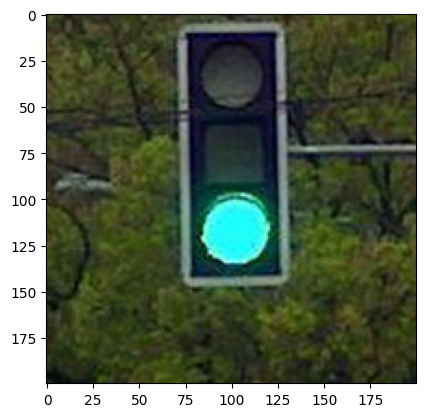

In [37]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from skimage.draw import disk

img_bgr = cv.imread('D:/MyProject/CV/CV1/tlights/200_45.jpg')

img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)

plt.imshow(img_rgb)

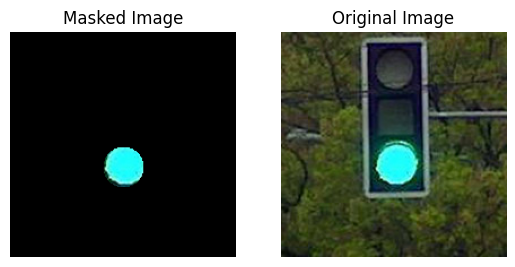

In [38]:
# 复制原始图像  
wellplate = np.copy(img_rgb)  
  
# 创建一个布尔类型的零矩阵作为掩码，其形状与wellplate的前两个维度相同  
mask = np.zeros(shape=wellplate.shape[0:2], dtype=bool)  
  
# 创建圆形掩码  
center = (120, 100)  
radius = 18  # 设置圆的半径  
# radius = 20  
# 使用disk函数创建圆形区域（注意：这里假设disk函数已定义或来自某个库）  
circle = disk(center=center, radius=radius, shape=wellplate.shape[0:2])  
mask[circle] = True  # 将圆形区域内的掩码值设为True  
  
# 复制原始图像并使用掩码  
masked_img = np.copy(wellplate)  
masked_img[np.logical_not(mask)] = 0  # 将掩码外的区域设为黑色  
  
# 创建一个包含两个子图的图表  
fig, (ax1, ax2) = plt.subplots(1, 2)    
  
# 显示应用掩码后的图像  
ax1.imshow(masked_img)    
ax1.set_title("Masked Image")    
ax1.axis('off')  # 关闭坐标轴  
  
# 显示原始图像  
ax2.imshow(img_rgb)    
ax2.set_title("Original Image")   
ax2.axis('off')  # 关闭坐标轴  
  
plt.show()

Text(0.5, 1.0, 'RGB')

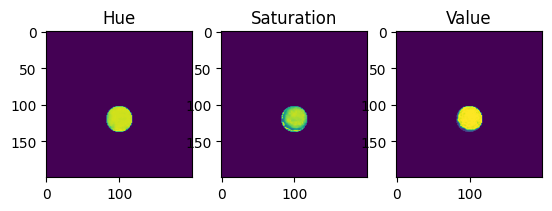

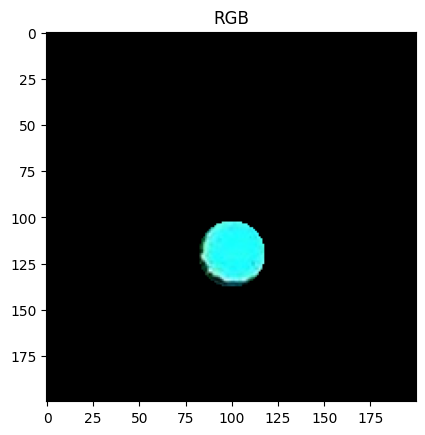

In [39]:
img_hsv = cv.cvtColor(masked_img, cv.COLOR_RGB2HSV)  # 将 RGB 图像转换为 HSV 图像

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)  # 创建一个包含三个子图的图形

ax1.imshow(img_hsv[:,:,0])  
ax1.set_title("Hue") 

ax2.imshow(img_hsv[:,:,1]) 
ax2.set_title("Saturation") 

ax3.imshow(img_hsv[:,:,2]) 
ax3.set_title("Value")  

plt.figure()  

plt.imshow(masked_img) 
plt.title("RGB")  

[90 82 77 95 75 80 69 71 60]


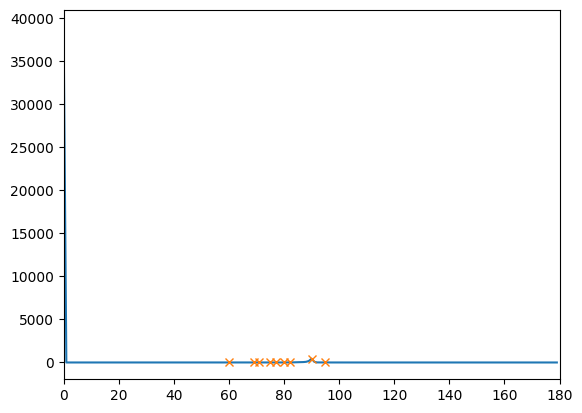

In [40]:
plt.figure()

plt.xlim([0,180])

histogram, bin_edges = np.histogram(
  img_hsv[:, :, 0], bins=180, range=(0, 180)
)

plt.plot(histogram)

from scipy.signal import find_peaks

peaks, _ = find_peaks(histogram)

_, sorted_peaks = zip(*sorted(zip(histogram[peaks], peaks), reverse=True))
sorted_peaks = np.asarray(sorted_peaks[:10])

print(sorted_peaks)

plt.plot(sorted_peaks,histogram[sorted_peaks],"x")